In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import pprint

In [15]:
#!pip install datetime

    100% |████████████████████████████████| 61kB 762kB/s ta 0:00:01


In [55]:
from datetime import datetime, date, timedelta

# Reflect Tables into SQLAlchemy ORM

In [93]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [43]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [44]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [45]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [46]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [95]:
inspector = inspect(engine)
inspector.get_table_names()
measurements = inspector.get_columns('measurement')
for feature in measurements:
    print(feature['name'], feature['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Climate Analysis

the last date in the query is 2017-08-23.
query begins on 2016-08-23 00:00:00.


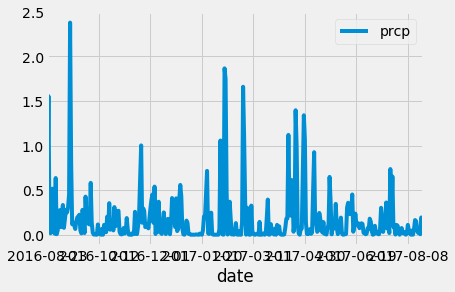

In [96]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(f"the last date in the query is {latest}.")



last = dt.datetime.strptime(latest,'%Y-%m-%d')
one_year = (last - dt.timedelta(days=365))

print(f"query begins on {one_year}.")
## Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

date_prcp = pd.read_sql("select date, prcp from measurement where date >= '2016-08-23';", conn)
# Save the query results as a Pandas DataFrame and set the index to the date column

date_prcp_avg = date_prcp.groupby(["date"]).mean()
date_prcp_avg.head()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
date_prcp_avg.plot( y='prcp')


![precipitation](Images/precipitation.png)

In [97]:
# Use Pandas to calcualte the summary statistics for the precipitation data
print(date_prcp.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


![describe](Images/describe.png)

In [99]:
# Design a query to show how many stations are available in this dataset?
stations = inspector.get_columns('station')
for feature in stations:
    print(feature['name'], feature['type'])
session.query(func.count(Station.id)).first()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


(9)

In [104]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.prcp)). \
                    group_by(Measurement.station). \
                    order_by(func.count(Measurement.prcp).desc()).all()
pprint.pprint(active_stations)

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]


In [105]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).first()

('USC00519281', 54.0, 85.0, 71.66378066378067)

(array([ 5.,  7.,  7., 12., 27., 41., 40., 57., 66., 52., 29.,  8.]),
 array([59., 61., 63., 65., 67., 69., 71., 73., 75., 77., 79., 81., 83.]),
 <a list of 12 Patch objects>)

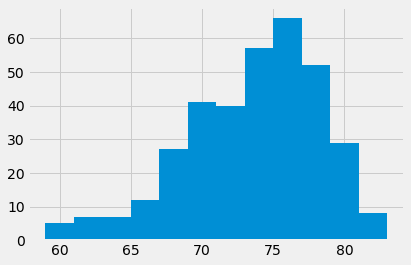

In [106]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Query temperatures
tobs_raw = session.query(Measurement.tobs). \
    filter(Measurement.date >= one_year). \
    filter(Measurement.station == active_stations[0][0]).all()

# Store temperatures in a list
tobs = [temp[0] for temp in tobs_raw]

# Plot
plt.hist(tobs, bins=12, label="temperature")

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
